**Basic Data Handling and Visualization**

In [1]:
# Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Display plots in notebook
# %matplotlib inline

In [2]:
# ============================================================
# Step 2: Create / Load Dataset
# ============================================================

# Creating a sample robot sensor dataset
data = {
    "Time": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Temperature": [45, 47, 46, 48, 50, 49, 51, 52, 53, 54],
    "Vibration": [0.20, 0.25, 0.22, 0.30, 0.35, 0.33, 0.40, 0.42, 0.45, 0.50],
    "Battery": [90, 88, 85, 83, 80, 78, 75, 73, 70, 68]
}

df = pd.DataFrame(data)

print("Dataset:\n")
print(df)

Dataset:

   Time  Temperature  Vibration  Battery
0     1           45       0.20       90
1     2           47       0.25       88
2     3           46       0.22       85
3     4           48       0.30       83
4     5           50       0.35       80
5     6           49       0.33       78
6     7           51       0.40       75
7     8           52       0.42       73
8     9           53       0.45       70
9    10           54       0.50       68


In [3]:
# ============================================================
# Step 3: Basic Data Inspection
# ============================================================

print("\nShape of Dataset:", df.shape)

print("\nColumn Names:")
print(df.columns)

print("\nData Types:")
print(df.dtypes)

print("\nStatistical Summary:")
print(df.describe())


Shape of Dataset: (10, 4)

Column Names:
Index(['Time', 'Temperature', 'Vibration', 'Battery'], dtype='object')

Data Types:
Time             int64
Temperature      int64
Vibration      float64
Battery          int64
dtype: object

Statistical Summary:
           Time  Temperature  Vibration    Battery
count  10.00000     10.00000  10.000000  10.000000
mean    5.50000     49.50000   0.342000  79.000000
std     3.02765      3.02765   0.100863   7.527727
min     1.00000     45.00000   0.200000  68.000000
25%     3.25000     47.25000   0.262500  73.500000
50%     5.50000     49.50000   0.340000  79.000000
75%     7.75000     51.75000   0.415000  84.500000
max    10.00000     54.00000   0.500000  90.000000


In [5]:
# ============================================================
# Step 4: Handling Missing Values
# ============================================================

# Introduce a missing value for demo
df.loc[3, "Temperature"] = np.nan

print("\nDataset with Missing Value:\n")
print(df)

# Check missing values
print("\nMissing Values Count:")
print(df.isnull().sum())

# Fill missing value with mean
df["Temperature"].fillna(df["Temperature"].mean(), inplace=True)

print("\nAfter Filling Missing Value:\n")
print(df)


Dataset with Missing Value:

   Time  Temperature  Vibration  Battery
0     1         45.0       0.20       90
1     2         47.0       0.25       88
2     3         46.0       0.22       85
3     4          NaN       0.30       83
4     5         50.0       0.35       80
5     6         49.0       0.33       78
6     7         51.0       0.40       75
7     8         52.0       0.42       73
8     9         53.0       0.45       70
9    10         54.0       0.50       68

Missing Values Count:
Time           0
Temperature    1
Vibration      0
Battery        0
dtype: int64

After Filling Missing Value:

   Time  Temperature  Vibration  Battery
0     1    45.000000       0.20       90
1     2    47.000000       0.25       88
2     3    46.000000       0.22       85
3     4    49.666667       0.30       83
4     5    50.000000       0.35       80
5     6    49.000000       0.33       78
6     7    51.000000       0.40       75
7     8    52.000000       0.42       73
8     9    53.0

/tmp/ipython-input-2306602815.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Temperature"].fillna(df["Temperature"].mean(), inplace=True)


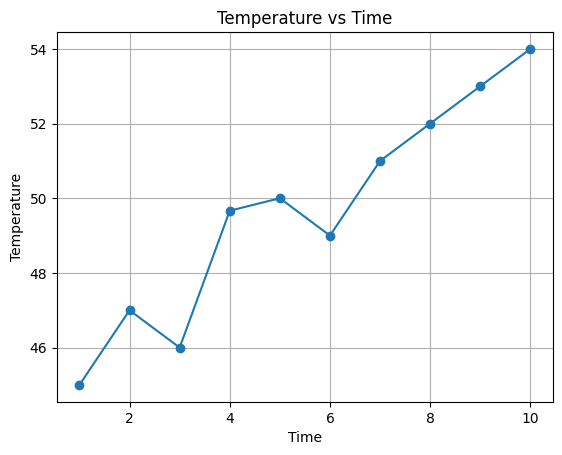

In [6]:
# ============================================================
# Step 5: Data Visualization
# ============================================================

# ---------- Line Plot ----------
plt.figure()
plt.plot(df["Time"], df["Temperature"], marker='o')
plt.title("Temperature vs Time")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.grid(True)
plt.show()

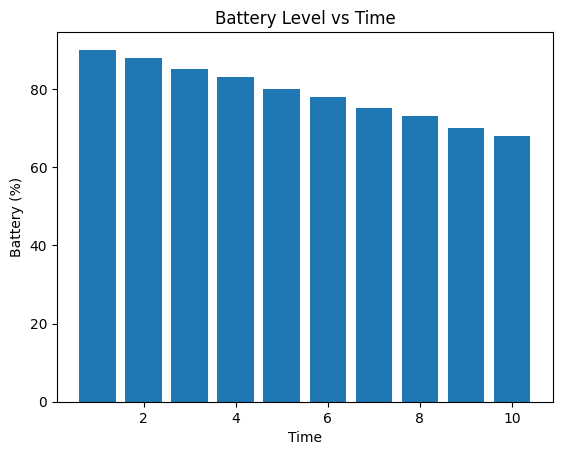

In [7]:
# ---------- Bar Chart ----------
plt.figure()
plt.bar(df["Time"], df["Battery"])
plt.title("Battery Level vs Time")
plt.xlabel("Time")
plt.ylabel("Battery (%)")
plt.show()

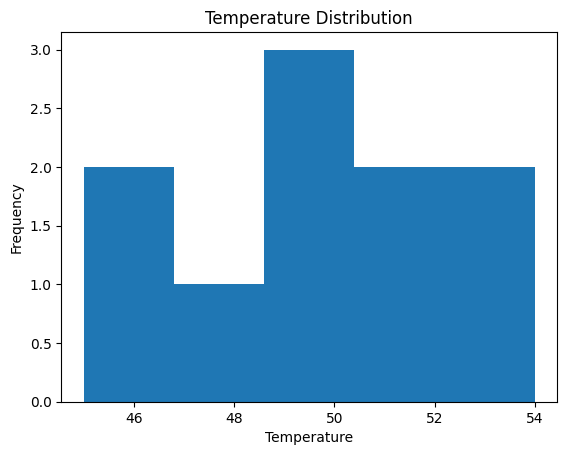

In [8]:
# ---------- Histogram ----------
plt.figure()
plt.hist(df["Temperature"], bins=5)
plt.title("Temperature Distribution")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

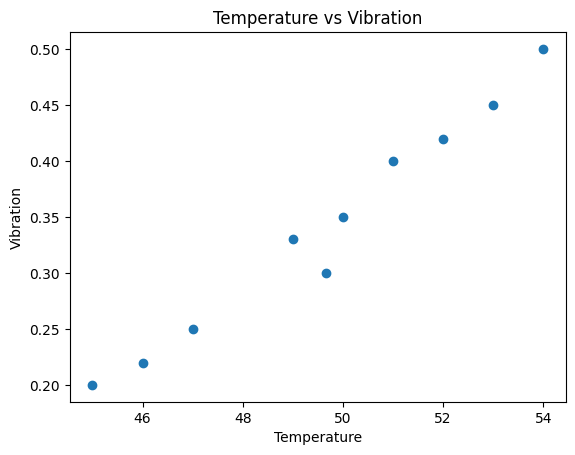

In [9]:
# ---------- Scatter Plot ----------
plt.figure()
plt.scatter(df["Temperature"], df["Vibration"])
plt.title("Temperature vs Vibration")
plt.xlabel("Temperature")
plt.ylabel("Vibration")
plt.show()

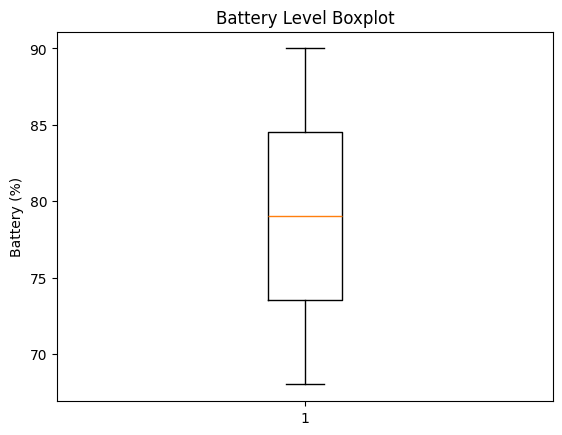

In [10]:
# ---------- Box Plot ----------
plt.figure()
plt.boxplot(df["Battery"])
plt.title("Battery Level Boxplot")
plt.ylabel("Battery (%)")
plt.show()


Correlation Matrix:

                 Time  Temperature  Vibration   Battery
Time         1.000000     0.960114   0.978751 -0.999406
Temperature  0.960114     1.000000   0.986537 -0.957143
Vibration    0.978751     0.986537   1.000000 -0.977549
Battery     -0.999406    -0.957143  -0.977549  1.000000


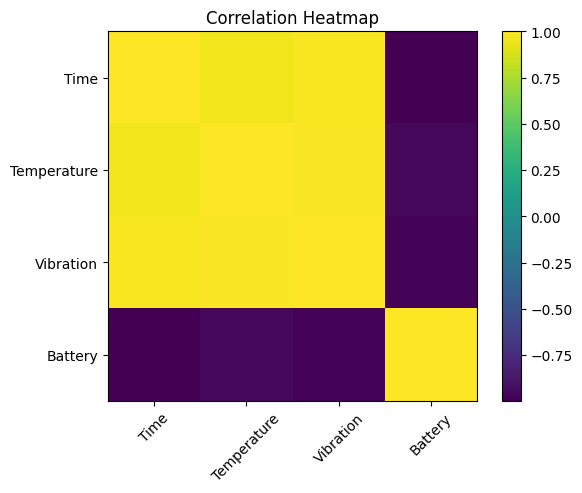

In [11]:
# ============================================================
# Step 6: Correlation Analysis
# ============================================================

correlation = df.corr()

print("\nCorrelation Matrix:\n")
print(correlation)

plt.figure()
plt.imshow(correlation)
plt.colorbar()
plt.xticks(range(len(correlation)), correlation.columns, rotation=45)
plt.yticks(range(len(correlation)), correlation.columns)
plt.title("Correlation Heatmap")
plt.show()